# Project 1 – Group 34
## Dataset: Heart Failure Clinical Records
**Source:** [UCI Machine Learning Repository](https://doi.org/10.24432/C5Z89R)
 
> This dataset contains the medical records of 299 patients who experienced heart failure, collected during their follow-up period. Each patient profile includes 13 clinical features.

In [156]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

Load data set and and split into the standard format(X,y),
Explanation of the data set:

$y$ is the target variable: **DEATH_EVENT** (binary indicator of patient death)

### Feature Description
| Feature                   | Type       | Description                                               | Unit                | Missing Values |
|---------------------------|------------|-----------------------------------------------------------|---------------------|---------------|
| age                       | Integer    | Age of the patient                                        | years               | no            |
| anaemia                   | Binary     | Decrease of red blood cells or hemoglobin                 | —                   | no            |
| creatinine_phosphokinase  | Integer    | Level of the CPK enzyme in the blood                      | mcg/L               | no            |
| diabetes                  | Binary     | If the patient has diabetes                               | —                   | no            |
| ejection_fraction         | Integer    | Percentage of blood leaving the heart at each contraction | %                   | no            |
| high_blood_pressure       | Binary     | If the patient has hypertension                           | —                   | no            |
| platelets                 | Continuous | Platelets in the blood                                    | kiloplatelets/mL    | no            |
| serum_creatinine          | Continuous | Level of serum creatinine in the blood                    | mg/dL               | no            |
| serum_sodium              | Integer    | Level of serum sodium in the blood                        | mEq/L               | no            |
| sex                       | Binary     | Sex (woman or man)                                        | —                   | no            |
| smoking                   | Binary     | If the patient smokes or not                              | —                   | no            |
| time                      | Integer    | Follow-up period                                          | days                | no            |
| death_event               | Binary     | If the patient died during the follow-up period           | —                   | no            |

In [157]:
df = pd.read_csv('../02452_Group34_Project1/data/heart_failure_clinical_records_dataset.csv')

X = df.drop(columns=['DEATH_EVENT'])         # Features without target
y = pd.Categorical(df['DEATH_EVENT'])        # Target as categorical

# Check the shape of the data
N, M = X.shape
assert N == 299, "There should be 299 samples in the Heart Failure dataset."
assert M == 12, "There should be 12 features in the Heart Failure dataset(13 together - target)"

# Display the first few rows of the dataframe
display(X.head())
display(y[:6])







,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


[1, 1, 1, 1, 1, 1]
Categories (2, int64): [0, 1]

In [158]:
print(X)



      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

Check for missing vallues and outliers

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


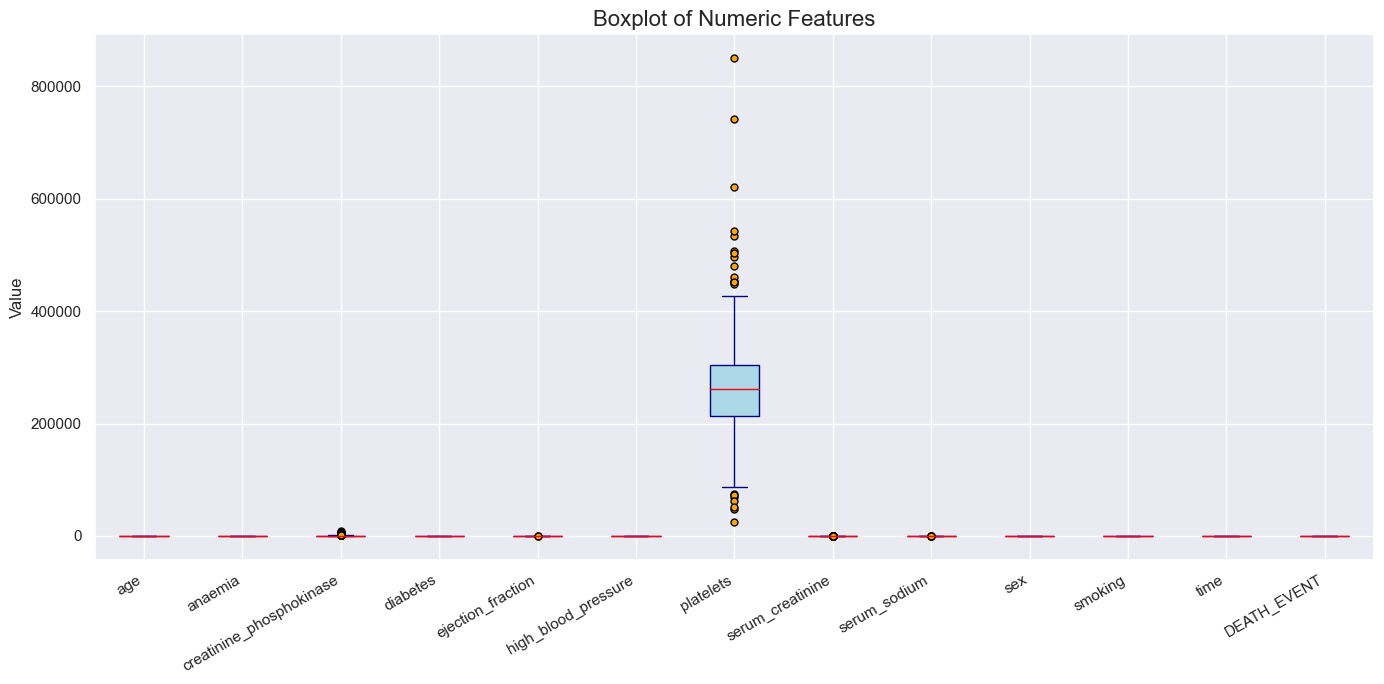

In [159]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(14,7))
box = df.boxplot(patch_artist=True,
                              boxprops=dict(facecolor='lightblue', color='navy'),
                              medianprops=dict(color='red'),
                              whiskerprops=dict(color='navy'),
                              capprops=dict(color='navy'),
                              flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

We can see there are no missing vallues, but there might be some outliers based on the box plot. We need to do subplots of all to determine that

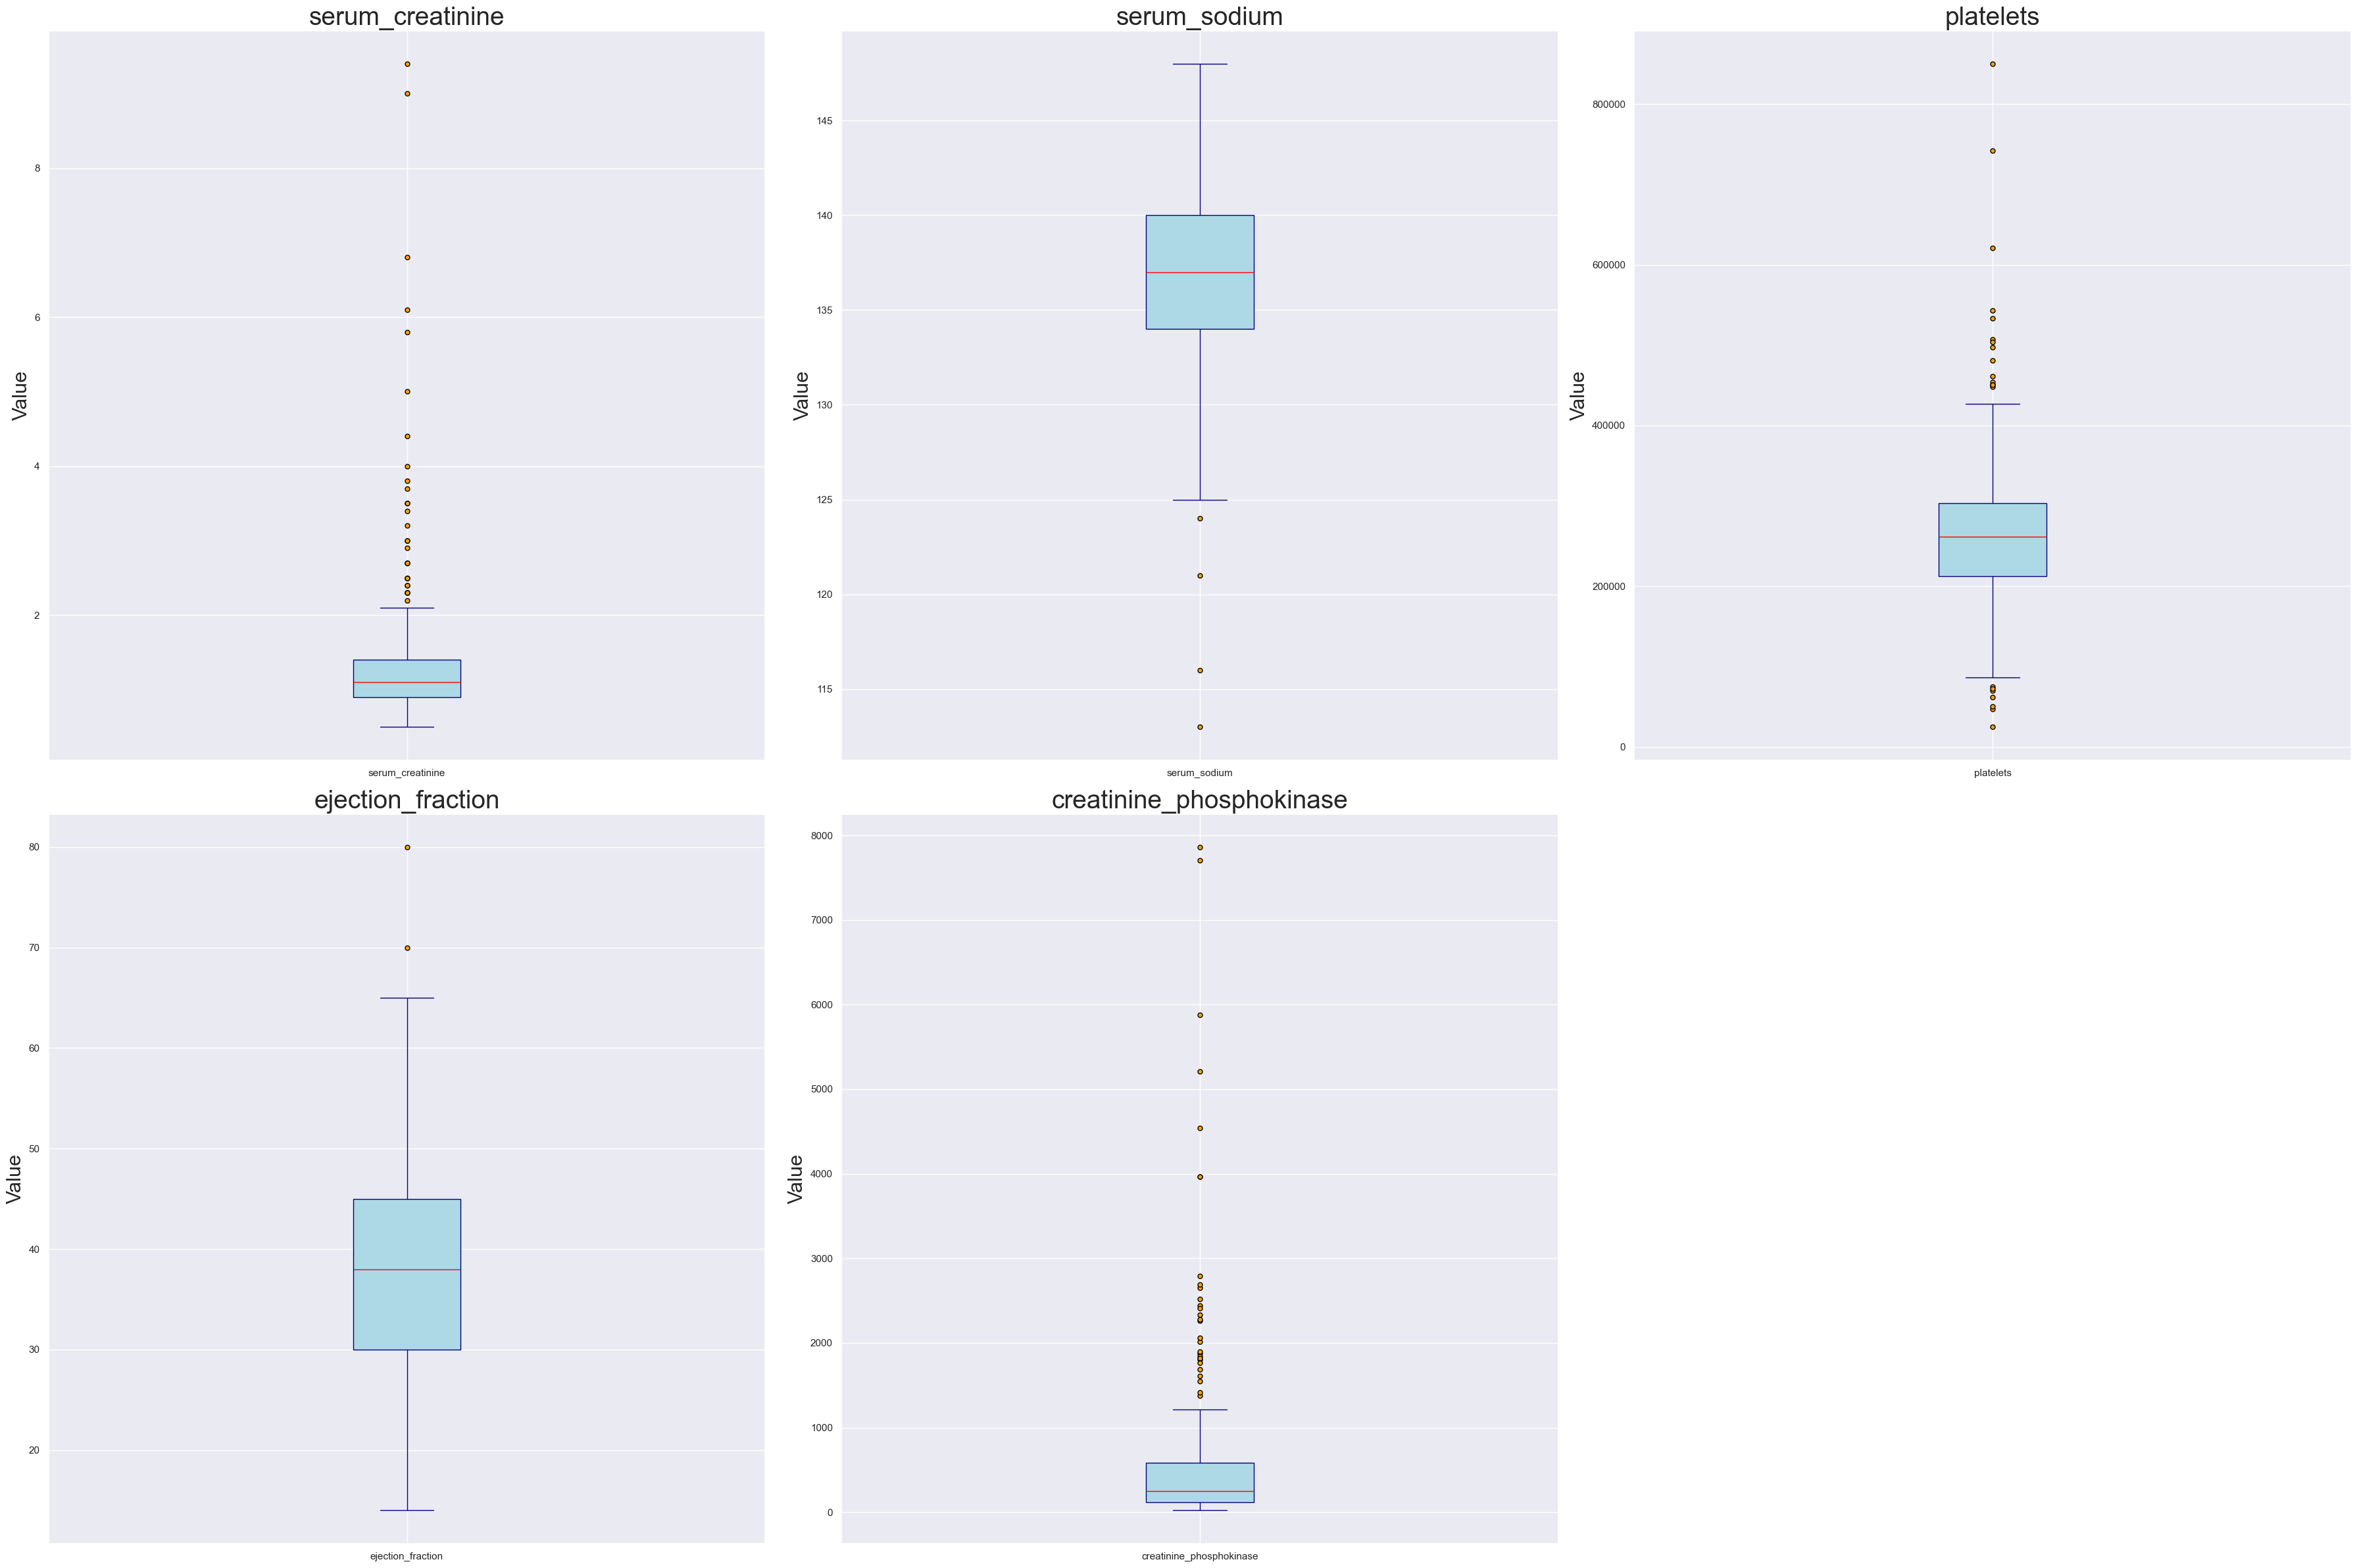

In [160]:
columns_to_show = ['serum_creatinine', 'serum_sodium', 'platelets', 'ejection_fraction', 'creatinine_phosphokinase']
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(columns_to_show)/2)), figsize=(36, 24))  
axes = axes.flatten()

for i, col in enumerate(columns_to_show):
    df.boxplot(column=col, ax=axes[i], patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='navy'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    axes[i].set_title(col, fontsize=28)
    axes[i].set_ylabel("Value", fontsize=22)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We can see in many of the numeric features there might be outliers fx ejection_fraction we see 2 vallues that are out of the scale for the rest of the values 

In [161]:
# Display summary statistics for all attributes
summary_stats = df.describe(include='all').transpose()
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
from scipy.stats import skew, kurtosis

# non-binary variabler
non_binary_vars = [
    c for c in df.columns
    if pd.api.types.is_numeric_dtype(df[c]) and df[c].nunique() > 2
]
print("Non-binary variables:", non_binary_vars)

# transformationer
def identity(x): return x
def log(x): return np.log(x + 1e-6)   # undgå log(0)
def sqrt(x): return np.sqrt(np.clip(x, 0, None))  # sqrt kræver >=0
def cbrt(x): return np.cbrt(x)        # kan håndtere negative
def reciprocal(x): return 1.0 / (x + 1e-6)  # undgå /0

transforms = {
    "identity": identity,
    "log": log,
    "sqrt": sqrt,
    "reciprocal": reciprocal
}
def trans_matrix(df, transforms):
    nT = len(transforms)
    nV = len(df.columns)
    fig, axes = plt.subplots(nV, nT, figsize=(4*nT, 3.5*nV), squeeze=False)
    fig.suptitle("Transformations and Normality Diagnostics", fontsize=16)
    results = []
    for j, var in enumerate(df.columns):
        x_raw = pd.to_numeric(df[var], errors="coerce")

        for i, (tname, f) in enumerate(transforms.items()):
            xt = pd.to_numeric(f(x_raw), errors="coerce").dropna().values
            
            ax = axes[j, i]
            # histogram i tæthed (density) så normal-PDF kan overlayes direkte
            counts, bins, patches = ax.hist(xt, bins=30, density=True,
                                            edgecolor="black", alpha=0.6)
            # normal-PDF med samme skala (density)
            mu = np.nanmean(xt)
            sd = np.nanstd(xt, ddof=1)
            if np.isfinite(sd) and sd > 0:
                xs = np.linspace(bins[0], bins[-1], 300)
                pdf = (1.0/(sd*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs - mu)/sd)**2)
                ax.plot(xs, pdf, lw=2)

            # titler og småting
            ax.set_title(f"{var} • {tname}", fontsize=9)
            ax.tick_params(labelsize=8)

            # diagnostics
            if i == 0:  # kun for første variabel
                osk = skew(xt, bias=False)
                oku = kurtosis(xt, fisher=True, bias=False)
            sk = skew(xt, bias=False)
            ku = kurtosis(xt, fisher=True, bias=False)  # excess kurtosis
            results.append({"attribute": var,
                            "transform": tname,
                            "skewness": abs(sk).round(3),
                            "excess_kurtosis": abs(ku).round(3),
                            "original_skewness": abs(osk).round(3),
                            "original_excess_kurtosis": abs(oku).round(3),
                            "delta_skewness": abs(sk).round(3) - abs(osk).round(3),
                            "delta_excess_kurtosis": abs(ku).round(3) - abs(oku).round(3),
                            "delta_score": abs(sk).round(3) + abs(ku).round(3) - (abs(osk).round(3) + abs(oku).round(3))
                            })

    plt.tight_layout()
    fig.suptitle("Transformations and Normality Diagnostics", fontsize=16)
    plt.show()
    return pd.DataFrame(results)




Non-binary variables: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


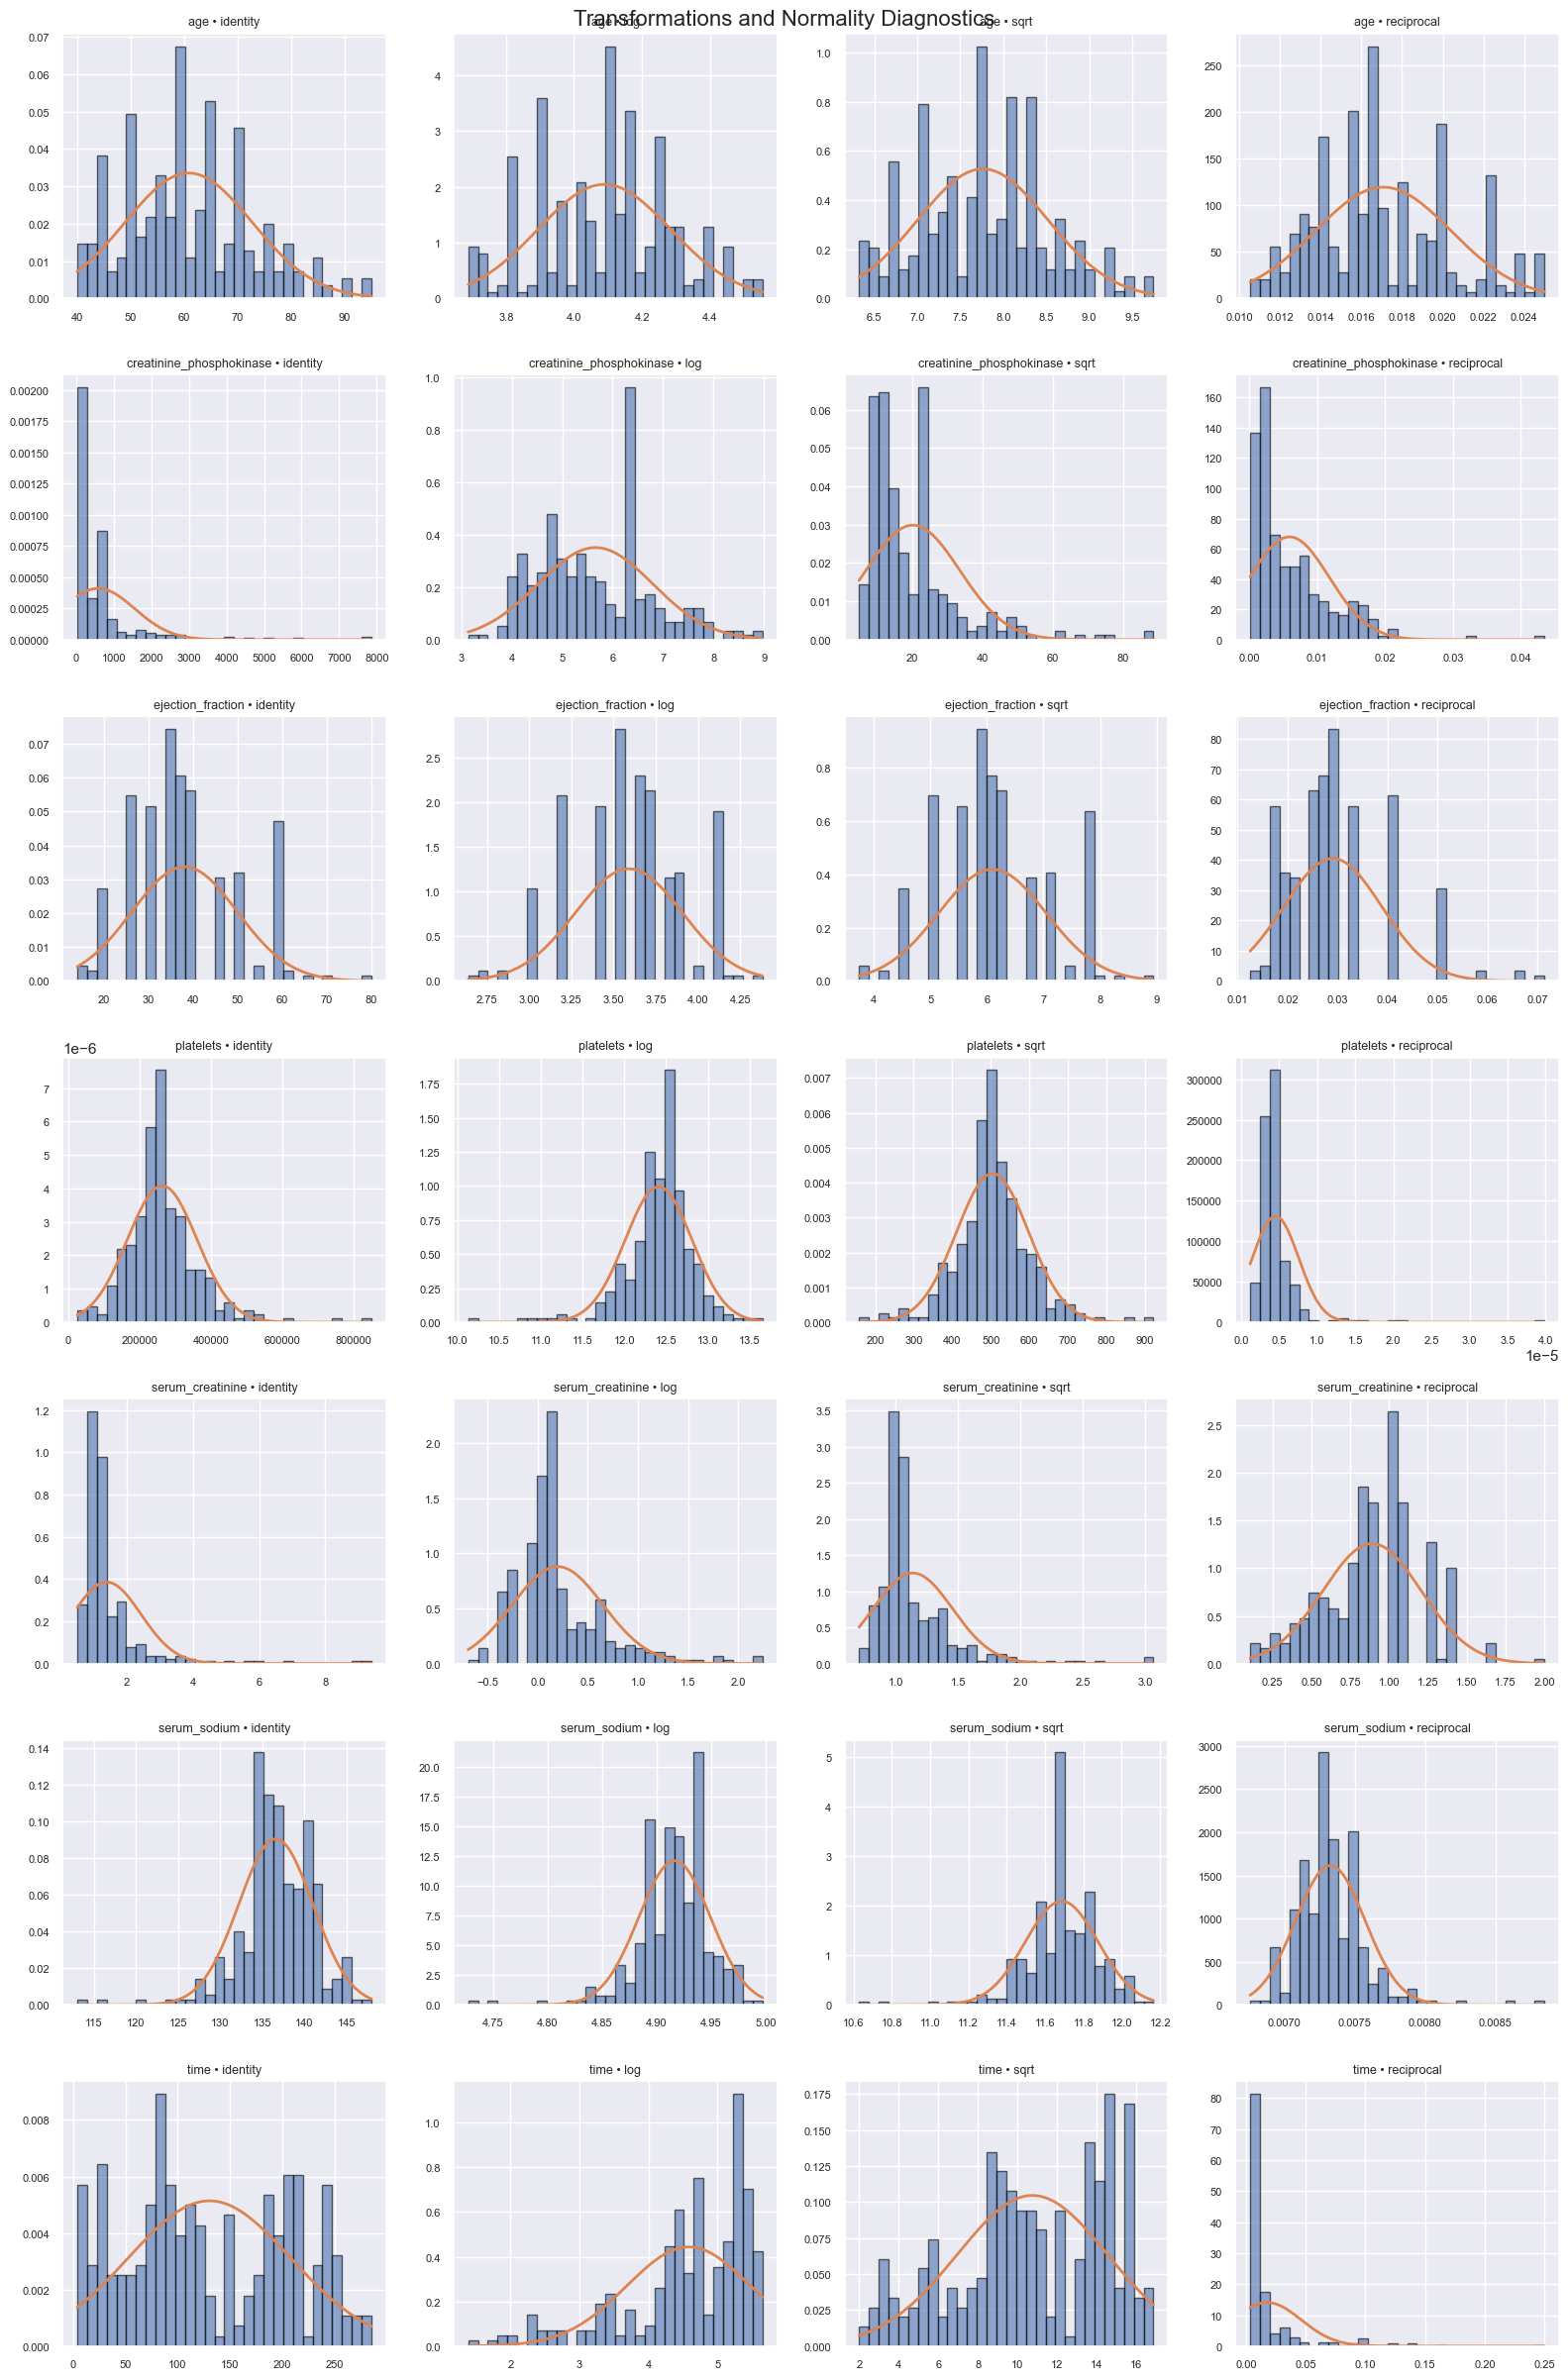

,attribute,transform,skewness,excess_kurtosis,original_skewness,original_excess_kurtosis,delta_skewness,delta_excess_kurtosis,delta_score
0,age,identity,0.423,0.185,0.423,0.185,0.000,0.000,0.000
1,age,log,0.016,0.546,0.423,0.185,-0.407,0.361,-0.046
2,age,sqrt,0.199,0.430,0.423,0.185,-0.224,0.245,0.021
3,age,reciprocal,0.426,0.439,0.423,0.185,0.003,0.254,0.257
4,creatinine_phosphokinase,identity,4.463,25.149,4.463,25.149,0.000,0.000,0.000
5,creatinine_phosphokinase,log,0.414,0.332,4.463,25.149,-4.049,-24.817,-28.866
6,creatinine_phosphokinase,sqrt,2.107,6.090,4.463,25.149,-2.356,-19.059,-21.415
7,creatinine_phosphokinase,reciprocal,1.900,6.241,4.463,25.149,-2.563,-18.908,-21.471
8,ejection_fraction,identity,0.555,0.041,0.555,0.041,0.000,0.000,0.000
9,ejection_fraction,log,0.272,0.053,0.555,0.041,-0.283,0.012,-0.271


                   attribute   transform  skewness  excess_kurtosis  \
0                        age    identity     0.423            0.185   
1                        age         log     0.016            0.546   
2                        age        sqrt     0.199            0.430   
3                        age  reciprocal     0.426            0.439   
4   creatinine_phosphokinase    identity     4.463           25.149   
5   creatinine_phosphokinase         log     0.414            0.332   
6   creatinine_phosphokinase        sqrt     2.107            6.090   
7   creatinine_phosphokinase  reciprocal     1.900            6.241   
8          ejection_fraction    identity     0.555            0.041   
9          ejection_fraction         log     0.272            0.053   
10         ejection_fraction        sqrt     0.156            0.219   
11         ejection_fraction  reciprocal     1.233            2.052   
12                 platelets    identity     1.462            6.209   
13    

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


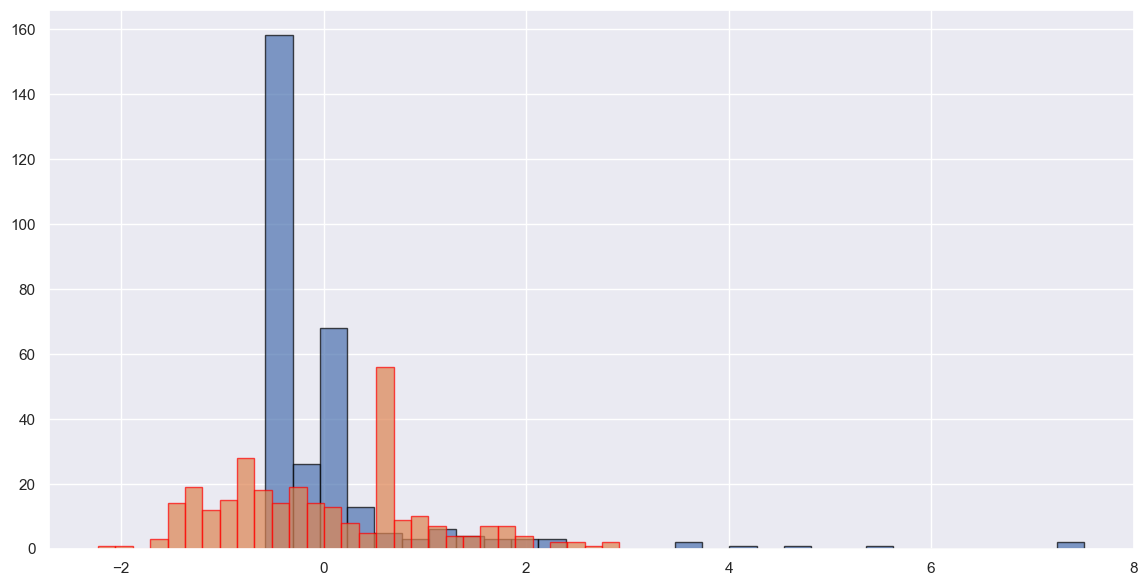

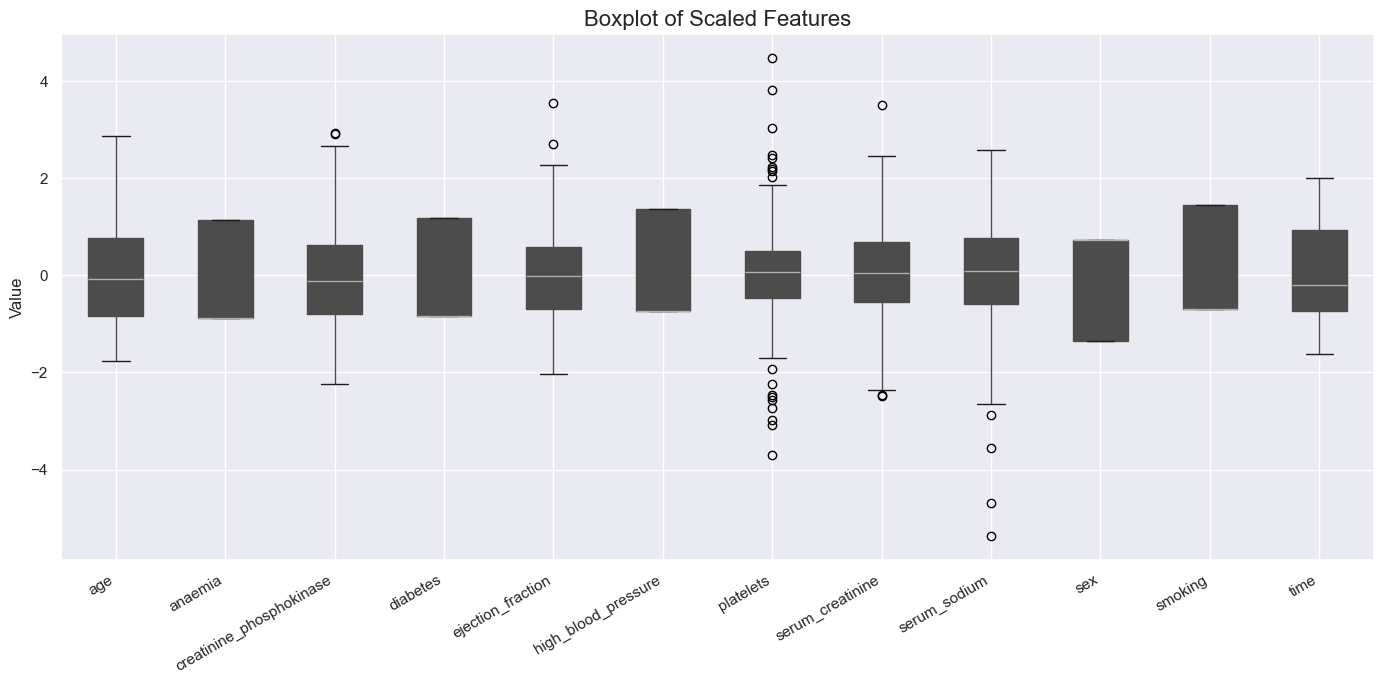

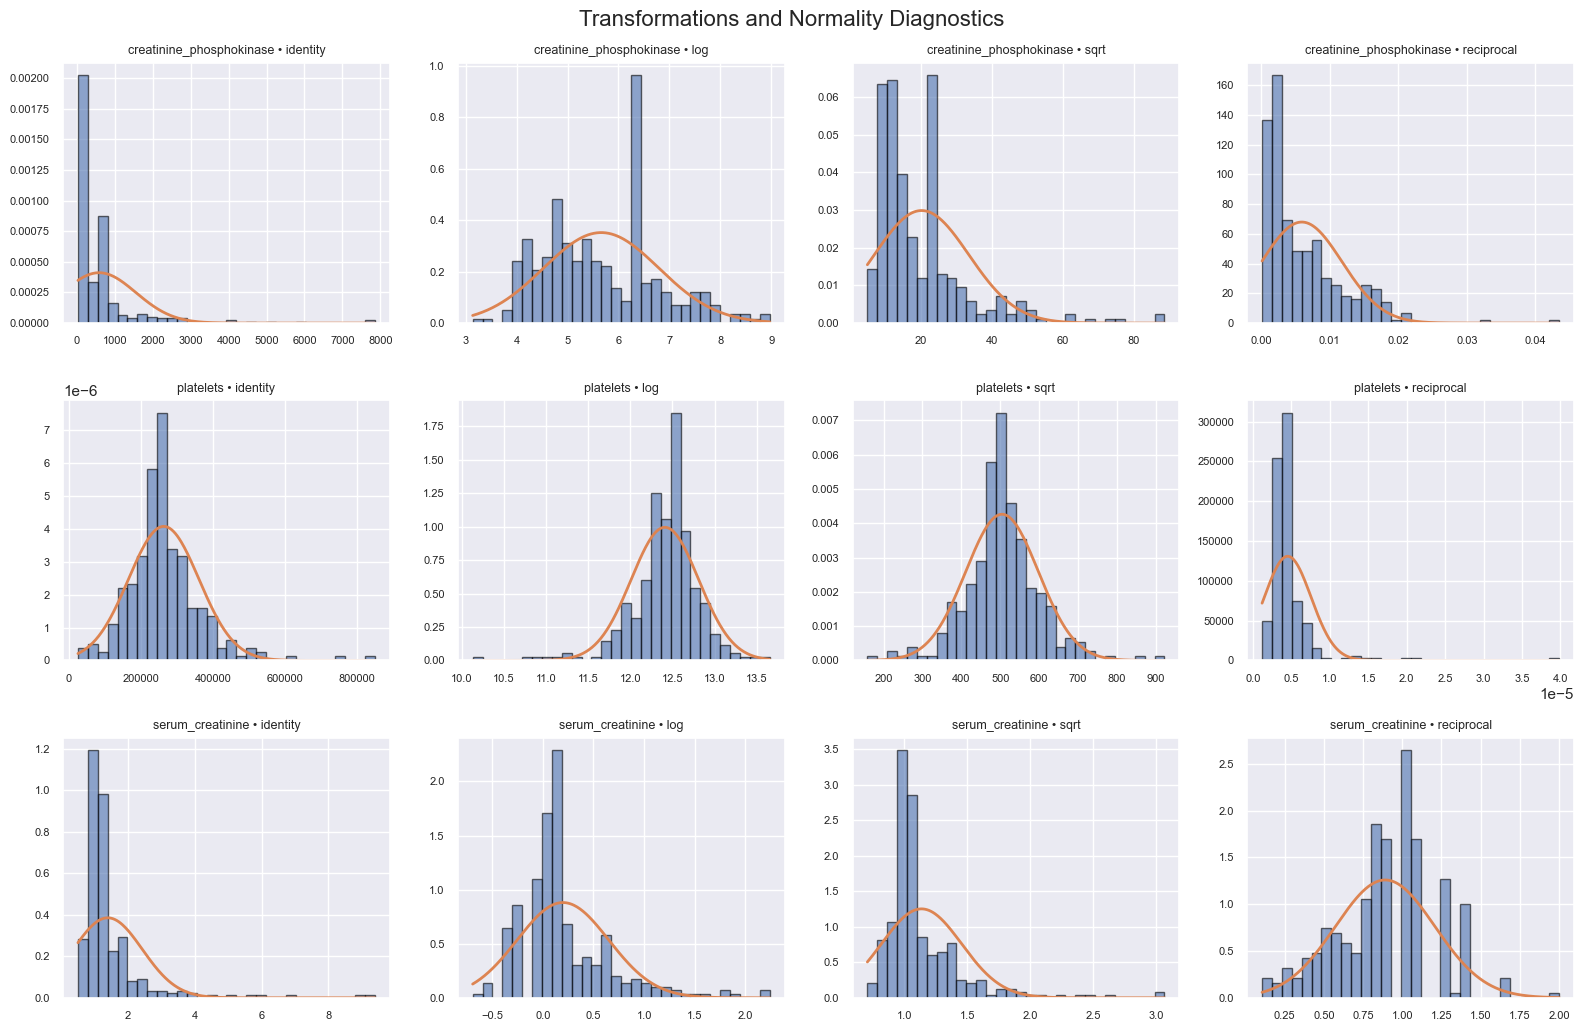

,attribute,transform,skewness,excess_kurtosis,original_skewness,original_excess_kurtosis,delta_skewness,delta_excess_kurtosis,delta_score
0,creatinine_phosphokinase,identity,4.463,25.149,4.463,25.149,0.000,0.000,0.000
1,creatinine_phosphokinase,log,0.414,0.332,4.463,25.149,-4.049,-24.817,-28.866
2,creatinine_phosphokinase,sqrt,2.107,6.090,4.463,25.149,-2.356,-19.059,-21.415
3,creatinine_phosphokinase,reciprocal,1.900,6.241,4.463,25.149,-2.563,-18.908,-21.471
4,platelets,identity,1.462,6.209,1.462,6.209,0.000,0.000,0.000
5,platelets,log,1.285,5.436,1.462,6.209,-0.177,-0.773,-0.950
6,platelets,sqrt,0.179,2.679,1.462,6.209,-1.283,-3.530,-4.813
7,platelets,reciprocal,6.758,65.800,1.462,6.209,5.296,59.591,64.887
8,serum_creatinine,identity,4.456,25.828,4.456,25.828,0.000,0.000,0.000
9,serum_creatinine,log,1.584,3.602,4.456,25.828,-2.872,-22.226,-25.098


In [ ]:

#winners = pd.DataFrame(df[['creatinine_phosphokinase', 'platelets', 'serum_creatinine']])
#non_bin = trans_matrix(df[non_binary_vars], transforms)
#display(non_bin)
#print(non_bin)

#results = trans_matrix(df, transforms)
#print(results)
#print(df.columns[0])
X_transformed = X.copy()

X_transformed['creatinine_phosphokinase'] = log(X_transformed['creatinine_phosphokinase'])
X_transformed['platelets'] = sqrt(X_transformed['platelets'])
X_transformed['serum_creatinine'] = reciprocal(X_transformed['serum_creatinine'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tscaled = pd.DataFrame(scaler.fit_transform(X_transformed), columns=X_transformed.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


display(X_scaled.head())
plt.figure(figsize=(14,7))
plt.hist(X_scaled['creatinine_phosphokinase'], bins=30, edgecolor='black', alpha=0.7)
plt.hist(X_tscaled['creatinine_phosphokinase'], bins=30, edgecolor='red', alpha=0.7)

plt.show()
plt.figure(figsize=(14,7))
box = X_tscaled.boxplot(patch_artist=True)
box.set_title("Boxplot of Scaled Features", fontsize=16)
box.set_ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout() 

plt.show()

trans_matrix(X[['creatinine_phosphokinase', 'platelets', 'serum_creatinine']], {"identity": identity, "log": log, "sqrt": sqrt, "reciprocal": reciprocal})

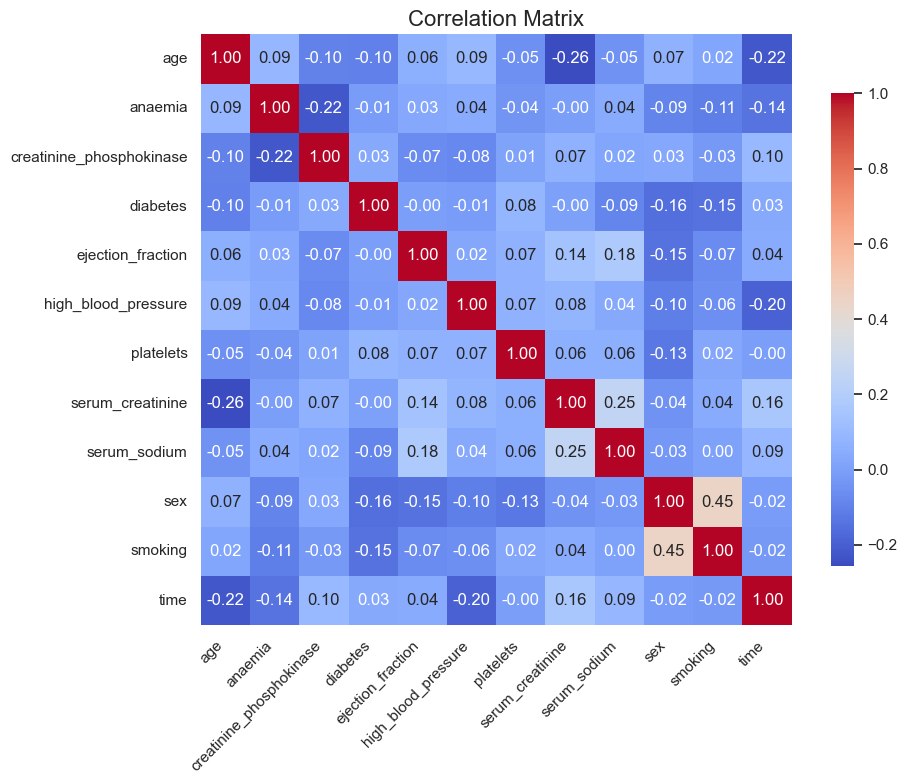

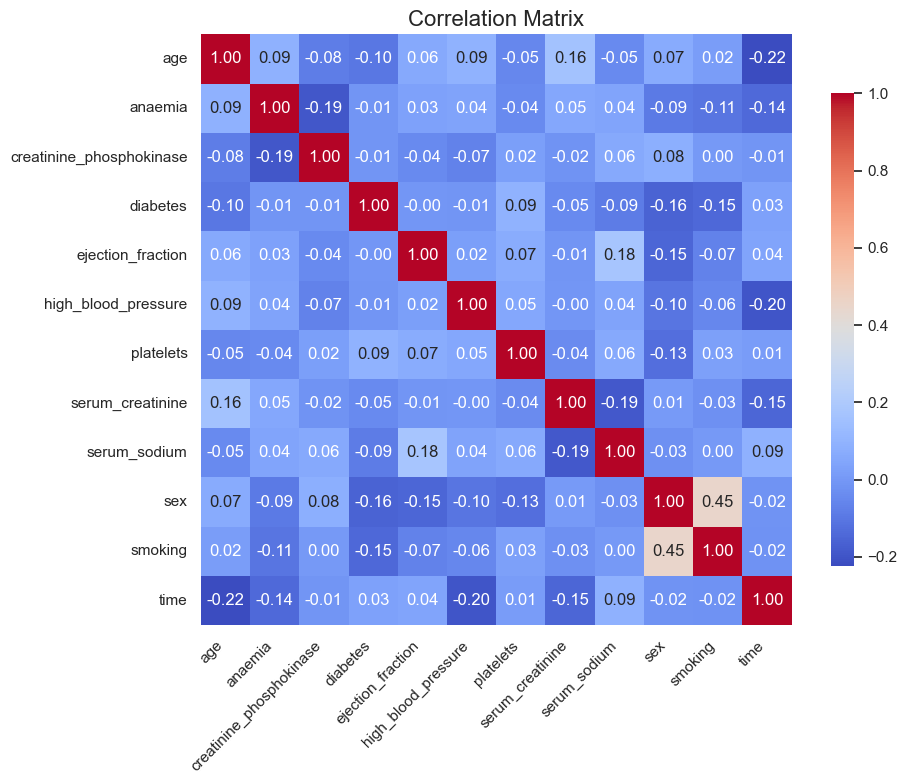

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608


In [165]:
def correlation_matrix(df):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title("Correlation Matrix", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return corr
correlation_matrix(X_tscaled)
correlation_matrix(X)